In [1]:
import sys

<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [2]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [3]:
ser = pd.Series(data=[100, 200, 300, 400, 500], index=['tom', 'bob', 'nancy', 'dan', 'eric'])

In [4]:
ser

tom      100
bob      200
nancy    300
dan      400
eric     500
dtype: int64

In [5]:
ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [6]:
ser['nancy']

300

In [7]:
ser[[4, 3, 1]]

eric    500
dan     400
bob     200
dtype: int64

In [8]:
'bob' in ser

True

In [9]:
ser

tom      100
bob      200
nancy    300
dan      400
eric     500
dtype: int64

In [10]:
ser * 2

tom       200
bob       400
nancy     600
dan       800
eric     1000
dtype: int64

In [11]:
ser ** 2

tom       10000
bob       40000
nancy     90000
dan      160000
eric     250000
dtype: int64

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [12]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [13]:
df = pd.DataFrame(d)
print(df)

          one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0


In [14]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [15]:
df.columns

Index(['one', 'two'], dtype='object')

In [16]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0


In [17]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five'])

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [18]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [19]:
pd.DataFrame(data)

,alex,joe,ema,dora,alice
0,1.0,2.0,NaN,NaN,NaN
1,NaN,NaN,5.0,10.0,20.0


In [20]:
pd.DataFrame(data, index=['orange', 'red'])

,alex,joe,ema,dora,alice
orange,1.0,2.0,NaN,NaN,NaN
red,NaN,NaN,5.0,10.0,20.0


In [21]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [22]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [23]:
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [24]:
df['three'] = df['one'] * df['two']
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [25]:
df['flag'] = df['one'] > 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [26]:
three = df.pop('three')

In [27]:
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [28]:
df

,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cerill,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,4444.0,False


In [29]:
del df['two']

In [30]:
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [31]:
df.insert(2, 'copy_of_one', df['one'])
df

,one,flag,copy_of_one
apple,100.0,False,100.0
ball,200.0,False,200.0
cerill,NaN,False,NaN
clock,300.0,True,300.0
dancy,NaN,False,NaN


In [32]:
df['one_upper_half'] = df['one'][:2]
df

,one,flag,copy_of_one,one_upper_half
apple,100.0,False,100.0,100.0
ball,200.0,False,200.0,200.0
cerill,NaN,False,NaN,NaN
clock,300.0,True,300.0,NaN
dancy,NaN,False,NaN,NaN


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

### Please note that **you will need to download the dataset**. 

Although the video for this notebook says that the data is in your folder, the folder turned out to be too large to fit on the edX platform due to size constraints.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called **movielens** in your **Week-4-pandas** folder. 

Let us look at the files in this dataset using the UNIX command ls.


In [4]:
cd movielens

C:\Users\Acer\Downloads\Week-4-Pandas\movielens


In [5]:
# Note: Adjust the name of the folder to match your local directory
import sys

In [10]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B021-2CFD

 Directory of C:\Users\Acer\Downloads\Week-4-Pandas\movielens

12/19/2019  06:10 PM    <DIR>          .
12/19/2019  06:10 PM    <DIR>          ..
12/12/2019  07:08 PM       435,164,157 genome-scores.csv
12/12/2019  07:08 PM            18,103 genome-tags.csv
12/12/2019  07:07 PM         1,368,578 links.csv
12/12/2019  07:08 PM         3,038,099 movies.csv
12/12/2019  07:08 PM       678,260,987 ratings.csv
12/12/2019  07:07 PM            10,460 README.txt
12/12/2019  07:07 PM        38,810,332 tags.csv
               7 File(s)  1,156,670,716 bytes
               2 Dir(s)  429,978,570,752 bytes free


In [11]:
cat ./movies.csv

SyntaxError: invalid syntax (<ipython-input-11-fbc15ee2aca4>, line 1)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [12]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [14]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [15]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [16]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [17]:
print(row_0)

userId           3
movieId        260
tag        classic
Name: 0, dtype: object


In [18]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [19]:
row_0['userId']

3

In [20]:
'rating' in row_0

False

In [21]:
row_0.name

0

In [22]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [23]:
tags.head()

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good


In [24]:
tags.index

RangeIndex(start=0, stop=1093360, step=1)

In [25]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [26]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

,userId,movieId,tag
0,3,260,classic
11,4,164909,cliche
2000,647,164179,twist ending


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [27]:
ratings['rating'].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [28]:
ratings['rating'].mean()

3.533854451353085

In [29]:
ratings.mean()

userId     81189.281154
movieId    21387.981943
rating         3.533854
dtype: float64

In [30]:
ratings['rating'].min()

0.5

In [31]:
ratings['rating'].max()

5.0

In [32]:
ratings['rating'].std()

1.0607439610179747

In [33]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [34]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.004413,0.001940
movieId,-0.004413,1.000000,-0.009216
rating,0.001940,-0.009216,1.000000


In [35]:
filter_1 = ratings['rating'] > 5
filter_1.any()

False

In [36]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [37]:
movies.shape

(62423, 3)

In [38]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

That's nice! No NULL values!

In [39]:
ratings.shape

(25000095, 3)

In [40]:
#is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

That's nice! No NULL values!

In [41]:
tags.shape

(1093360, 3)

In [42]:
#is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

We have some tags which are NULL.

In [43]:
tags = tags.dropna()

In [44]:
#Check again: is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [45]:
tags.shape

(1093344, 3)

That's nice! No NULL values! Notice the number of lines have decreased.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C4A558608>]],
      dtype=object)

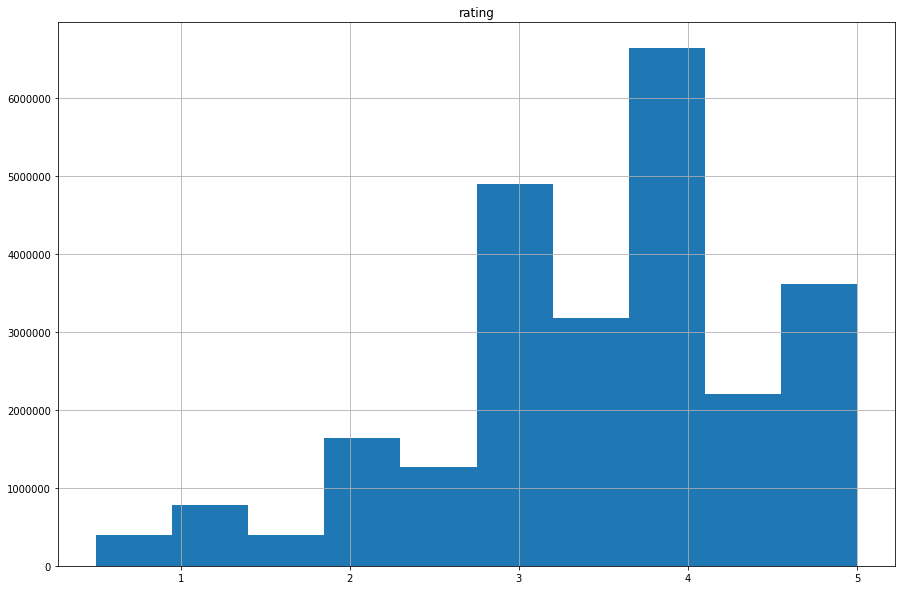

In [46]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [47]:
tags['tag'].head()

0             classic
1              sci-fi
2         dark comedy
3      great dialogue
4    so bad it's good
Name: tag, dtype: object

In [48]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [49]:
ratings[1000:1010]

,userId,movieId,rating
1000,4,45517,2.5
1001,4,45722,3.5
1002,4,46948,2.5
1003,4,46972,3.5
1004,4,48780,5.0
1005,4,48982,3.0
1006,4,49272,3.5
1007,4,49396,3.5
1008,4,49649,1.0
1009,4,50601,1.5


In [50]:
tag_counts = tags['tag'].value_counts()
tag_counts[:10]

sci-fi                8330
atmospheric           6516
action                5907
comedy                5702
surreal               5326
based on a book       5079
twist ending          4820
funny                 4738
visually appealing    4526
dystopia              4257
Name: tag, dtype: int64

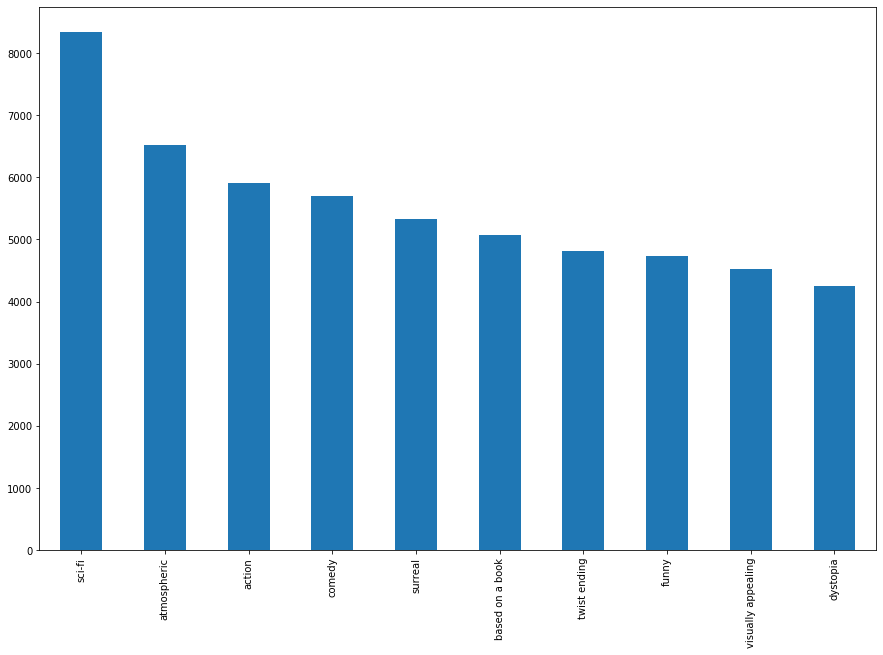

In [51]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [52]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][-5:]

,userId,movieId,rating
25000088,162541,41566,4.0
25000089,162541,45517,4.5
25000090,162541,50872,4.5
25000093,162541,58559,4.0
25000094,162541,63876,5.0


In [53]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

,movieId,title,genres
309,313,"Swan Princess, The (1994)",Animation|Children
359,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
387,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
545,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
551,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
580,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
586,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
587,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
588,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
602,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


In [54]:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
309,313,"Swan Princess, The (1994)",Animation|Children
359,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
387,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
545,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
551,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [55]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,393068
1.0,776815
1.5,399490
2.0,1640868
2.5,1262797
3.0,4896928
3.5,3177318
4.0,6639798
4.5,2200539


In [56]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.tail()

,rating
movieId,
209157,1.5
209159,3.0
209163,4.5
209169,3.0
209171,3.0


In [57]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,57309
2,24228
3,11804
4,2523
5,11714


In [58]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
209157,1
209159,1
209163,1
209169,1
209171,1


<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [59]:
tags.head()

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good


In [60]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [61]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,791,Owned
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1048,imdb top 250
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1361,Pixar
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,Pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,time travel


More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggregation, merging, and filters to get useful analytics
</p>

In [62]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.893708
1,2,3.251527
2,3,3.142028
3,4,2.853547
4,5,3.058434


In [63]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
59042,209157,We (2018),Drama,1.5
59043,209159,Window of the Soul (2001),Documentary,3.0
59044,209163,Bad Poems (2018),Comedy|Drama,4.5
59045,209169,A Girl Thing (2001),(no genres listed),3.0
59046,209171,Women of Devil's Island (1962),Action|Adventure|Drama,3.0


In [64]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
59027,209121,Adrenalin: The BMW Touring Car Story (2014),Documentary,4.0
59028,209123,Square Roots: The Story of SpongeBob SquarePan...,Documentary,4.0
59029,209129,Destination Titan (2011),Documentary,4.5
59041,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.0
59044,209163,Bad Poems (2018),Comedy|Drama,4.5


In [65]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
4,5,Father of the Bride Part II (1995),Comedy,3.058434
6,7,Sabrina (1995),Comedy|Romance,3.363666


In [66]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating
58990,208911,Cheating in Chains (2006),Comedy,4.0000
58998,208939,Klaus (2019),Adventure|Animation|Children|Comedy,4.3125
59001,208945,Powder (2019),Comedy|Drama,4.5000
59041,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.0000
59044,209163,Bad Poems (2018),Comedy|Drama,4.5000


<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [67]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

In [68]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [69]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </p>

In [70]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [71]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [72]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [73]:
movies.tail()

,movieId,title,genres,year
62418,209157,We (2018),Drama,2018
62419,209159,Window of the Soul (2001),Documentary,2001
62420,209163,Bad Poems (2018),Comedy|Drama,2018
62421,209169,A Girl Thing (2001),(no genres listed),2001
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama,1962


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [74]:
import pandas as pd

In [75]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [76]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [77]:
tags.head(5)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [78]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware

</p>

In [79]:

tags['parsed_time'].dtype

dtype('<M8[ns]')

In [80]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,3,260,classic,1439472355,2015-08-13 13:25:55
1,3,260,sci-fi,1439472256,2015-08-13 13:24:16


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [81]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

((1093360, 5), (692112, 5))

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [82]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
900600,129396,2788,monty python,1135429210,2005-12-24 13:00:10
900595,129396,1732,coen brothers,1135429236,2005-12-24 13:00:36
900592,129396,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
900591,129396,1193,jack nicholson,1135429371,2005-12-24 13:02:51
900607,129396,5004,peter sellers,1135429399,2005-12-24 13:03:19
900589,129396,47,brad pitt,1135429412,2005-12-24 13:03:32
900590,129396,47,morgan freeman,1135429412,2005-12-24 13:03:32
900605,129396,4011,guy ritchie,1135429431,2005-12-24 13:03:51
900604,129396,4011,brad pitt,1135429431,2005-12-24 13:03:51
900588,129396,32,bruce willis,1135429442,2005-12-24 13:04:02


<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie Ratings related to the Year of Launch?

In [86]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
59042,209157,1.5
59043,209159,3.0
59044,209163,4.5
59045,209169,3.0
59046,209171,3.0


In [87]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

,movieId,rating
movieId,1.000000,-0.093459
rating,-0.093459,1.000000


In [88]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1874,3.027778
1,1878,2.909091
2,1880,2.666667
3,1883,2.636364
4,1887,1.750000
5,1888,2.373042
6,1890,2.196667
7,1891,1.692842
8,1892,1.530769
9,1894,2.376825


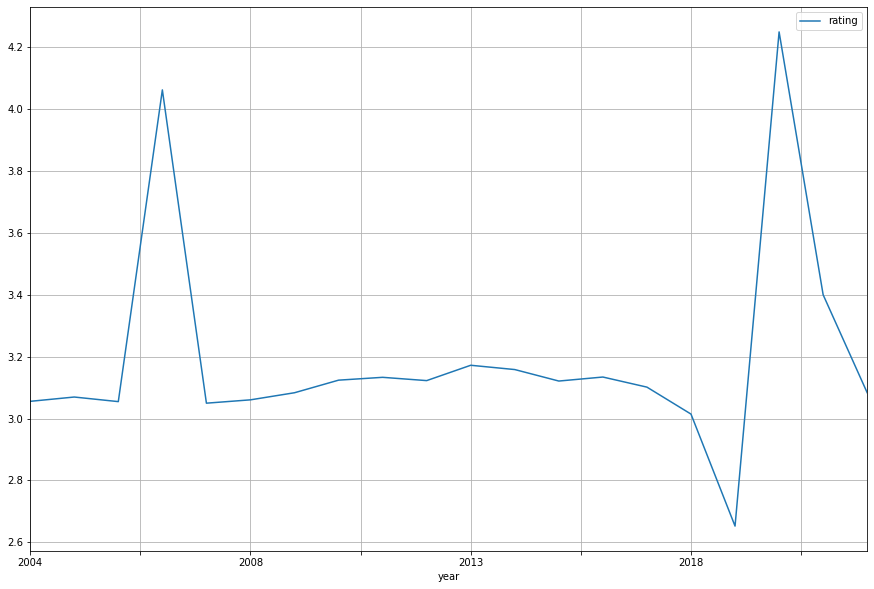

In [89]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the box office movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>